# 各属性频率分布探索

## 读入数据,整理数据

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from datetime import datetime
import matplotlib.pyplot as plt

# 把id等字段转成字符串
df = pd.read_csv('aggre.csv',encoding='gbk')
df.USER_ID = df.USER_ID.astype('str')
df.ACC_NBR = df.ACC_NBR.astype('str')
df.USER_DEVELOP_DEPART_ID = df.USER_DEVELOP_DEPART_ID.astype('str')
#去掉空值
df.dropna(subset=['FEE_12','SETT_CHARGE_12'])
# 转换日期
df['OPEN_DATE'] = pd.to_datetime(df['OPEN_DATE'],format='%Y/%m/%d %H:%M')
df['delta_time_now'] = datetime.now() - df['OPEN_DATE']
#在网时长(月),以每月平均30天计
df['delta_time_now_month'] = [t.days / 30 for t in df['delta_time_now']]
# 分转为元
df['FEE_12'] = df['FEE_12'] / 100
df['SETT_CHARGE_12'] = df['SETT_CHARGE_12'] / 100

D:\develop\Anaconda\envs\py27\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (5,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [56]:
df.describe()

,AMAIN_PP_ID,USER_ONLINE_DURA,G4_YICHANG_ESN_FLAG,G4_YICHANG_SERV_FLAG,CALL_DURATION_AVG,CALL_TIMES_AVG,SMS_TIMES_AVG,IX_KBYTES_AVG,ACTIVE_FLAG,LEASE_FLAG,ACTIVE_DAY_NUM_AVG,JWQ_NUM_AVG,FEE_12,SETT_CHARGE,SETT_CHARGE_12,delta_time_now,delta_time_now_month
count,4.489920e+05,448992.000000,448992.000000,448992.000000,448992.000000,448992.000000,448992.000000,448992.000000,448992.000000,448992.000000,448992.000000,448992.000000,448992.000000,448992.000000,448992.000000,448992,448992.000000
mean,8.313951e+08,5.285473,0.554270,0.197404,93.193378,105.671763,1.936061,426.624490,0.906159,0.992753,13.450765,20.080556,412.619556,3571.528604,457.657892,301 days 13:50:33.006757,9.466469
std,3.620822e+08,2.637171,0.497047,0.398041,206.413685,320.329271,46.498393,568.538545,0.291608,0.084822,7.658413,182.813505,342.275465,16112.286664,328.126553,79 days 19:55:33.046152,2.690013
min,2.000100e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.190000,-6450.000000,-100.000000,156 days 23:30:50.010000,5.000000
25%,9.930250e+08,4.000000,0.000000,0.000000,3.000000,4.000000,0.000000,137.000000,1.000000,1.000000,7.000000,0.000000,246.900000,0.000000,272.200000,260 days 22:31:07.260000,8.000000
50%,9.930250e+08,5.000000,1.000000,0.000000,37.000000,23.000000,0.000000,325.000000,1.000000,1.000000,15.000000,1.000000,324.000000,0.000000,426.200000,291 days 08:15:24.010000,9.000000
75%,9.930340e+08,6.000000,1.000000,0.000000,120.000000,109.000000,1.000000,571.000000,1.000000,1.000000,19.000000,4.000000,430.200000,0.000000,529.200000,336 days 08:11:42.010000,11.000000
max,9.990268e+08,99.000000,1.000000,1.000000,9069.000000,8124.000000,24662.000000,64900.000000,1.000000,1.000000,31.000000,6726.000000,10741.700000,167440.000000,2150.800000,3140 days 03:39:43.010000,104.000000


### 1. 累计收入(FEE_12)的分布情况


In [57]:
import matplotlib
matplotlib.rcParams['font.family']='SimHei'

plt.subplot(121)
sns.distplot(df['FEE_12'],kde=False)
plt.xlabel(u'累计收入(元)')
plt.subplot(122)
sns.boxplot(df['FEE_12'])
plt.xlabel(u'累计收入(元)')
fig = plt.gcf()
fig.set_size_inches(18.5, 7.5)

# plt.show()
plt.savefig('fee_total.png')

可以看到大多数累计收入集中在2000元以下,少部分超出这个范围,我们进一步看看2000元以内的情况:

In [58]:
plt.subplot(121)
sns.distplot(df['FEE_12'][df['FEE_12']<2000])
plt.xlabel(u'累计收入(元)')
plt.subplot(122)
sns.boxplot(df['FEE_12'][df['FEE_12']<2000])
plt.xlabel(u'累计收入(元)')
fig = plt.gcf()
fig.set_size_inches(18.5, 7.5)

# plt.show()
plt.savefig('fee_lt_2000.png')

更进一步看看500以内的分布情况

In [59]:
plt.subplot(121)
sns.distplot(df['FEE_12'][df['FEE_12']<500],kde=False)
plt.xlabel(u'累计收入(元)')
plt.subplot(122)
sns.boxplot(df['FEE_12'][df['FEE_12']<500])
plt.xlabel(u'累计收入(元)')
fig = plt.gcf()
fig.set_size_inches(18.5, 7.5)

# plt.show()
plt.savefig('fee_lt_500.png')

## 2.在网时长的分布情况 

In [60]:
p = plt.figure()
plt.subplot(121)
sns.distplot(df['delta_time_now_month'],kde=False)
plt.xlabel(u'在网时长(月)')
plt.subplot(122)
sns.boxplot(df['delta_time_now_month'])
plt.xlabel(u'在网时长(月)')
fig = plt.gcf()
fig.set_size_inches(18.5, 7.5)

# plt.show()
plt.savefig('active.png')

看看20个月以下的:

In [61]:
p = plt.figure()
plt.subplot(121)
x_range = np.arange(0, 20) 

sns.distplot(df['delta_time_now_month'][df['delta_time_now_month']<20],norm_hist=False,kde =False)#,kde_kws={'xticks':x_range})
ax = plt.gca()
ax.set_xticks(x_range)  
# sns.set_style(rc={'xtick.major.size': 2})
plt.xlabel(u'在网时长(月)')
plt.subplot(122)
sns.boxplot(df['delta_time_now_month'][df['delta_time_now_month']<20])
plt.xlabel(u'在网时长(月)')
fig = plt.gcf()
fig.set_size_inches(18.5, 7.5)

# plt.show()
plt.savefig('active_lt_2000.png')

## 3. 交往圈数量

In [62]:
p = plt.figure()
plt.subplot(121)
sns.distplot(df['JWQ_NUM_AVG'])
plt.xlabel(u'交往圈数量(个)')
plt.subplot(122)
sns.boxplot(df['JWQ_NUM_AVG'])
plt.xlabel(u'交往圈数量(个)')
fig = plt.gcf()
fig.set_size_inches(18.5, 7.5)

# plt.show()
plt.savefig('jwq_total.png')

这个差异有点大,两边都看看,是什么情况

### 3.1交往圈个数不高的分布情况(小于10)

In [63]:
p = plt.figure()
plt.subplot(121)
sns.distplot(df['JWQ_NUM_AVG'][df['JWQ_NUM_AVG']<10],kde=False)
plt.xlabel(u'交往圈数量(个)')
plt.subplot(122)
sns.boxplot(df['JWQ_NUM_AVG'][df['JWQ_NUM_AVG']<10])
plt.xlabel(u'交往圈数量(个)')
fig = plt.gcf()
fig.set_size_inches(18.5, 7.5)

# plt.show()
plt.savefig('jwq_lt_1000.png')

### 3.2 交往圈个数很高的用户的分布情况(大于1000)

In [64]:
p = plt.figure()
plt.subplot(121)
sns.distplot(df['JWQ_NUM_AVG'][df['JWQ_NUM_AVG']>1000],kde = False)
plt.xlabel(u'交往圈数量(个)')
plt.subplot(122)
sns.boxplot(df['JWQ_NUM_AVG'][df['JWQ_NUM_AVG']>1000])
plt.xlabel(u'交往圈数量(个)')
fig = plt.gcf()
fig.set_size_inches(18.5, 7.5)

# plt.show()
plt.savefig('jwq_gt_1000.png')

##  4. 活跃天数

In [65]:
p = plt.figure()
plt.subplot(121)
sns.distplot(df['ACTIVE_DAY_NUM_AVG'],kde=False)
plt.xlabel(u'活跃天数(天)')
plt.subplot(122)
sns.boxplot(df['ACTIVE_DAY_NUM_AVG'])
plt.xlabel(u'活跃天数(天)')
fig = plt.gcf()
fig.set_size_inches(18.5, 7.5)

# plt.show()
plt.savefig('active_day.png')

## 5.语音次数 

In [66]:
p = plt.figure()
plt.subplot(121)
sns.distplot(df['CALL_TIMES_AVG'])
plt.xlabel(u'语音次数(次)')
plt.subplot(122)
sns.boxplot(df['CALL_TIMES_AVG'])
plt.xlabel(u'语音次数(次)')
fig = plt.gcf()
fig.set_size_inches(18.5, 7.5)

# plt.show()
plt.savefig('call_time.png')

### 6.1 语音次数很低的用户的分布情况(小于300)

In [67]:
p = plt.figure()
plt.subplot(121)
sns.distplot(df['CALL_TIMES_AVG'][df['CALL_TIMES_AVG']<300],kde = False)
plt.xlabel(u'语音次数(次)')
plt.subplot(122)
sns.boxplot(df['CALL_TIMES_AVG'][df['CALL_TIMES_AVG']<300])
plt.xlabel(u'语音次数(次)')
fig = plt.gcf()
fig.set_size_inches(18.5, 7.5)

# plt.show()
plt.savefig('call_time_lt_300.png')

### 6.1 语音次数很高的用户的分布情况(大于300)

In [68]:
p = plt.figure()
plt.subplot(121)
sns.distplot(df['CALL_TIMES_AVG'][df['CALL_TIMES_AVG']>300],kde = False)
plt.xlabel(u'语音次数(次)')
plt.subplot(122)
sns.boxplot(df['CALL_TIMES_AVG'][df['CALL_TIMES_AVG']>300])
plt.xlabel(u'语音次数(次)')
fig = plt.gcf()
fig.set_size_inches(18.5, 7.5)

# plt.show()
plt.savefig('call_time_gt_300.png')

## 6.通话时长的分布 

In [69]:
p = plt.figure()
plt.subplot(121)
sns.distplot(df['CALL_DURATION_AVG'][df['CALL_DURATION_AVG']],kde = False)
plt.xlabel(u'通话时长(分钟)')
plt.subplot(122)
sns.boxplot(df['CALL_DURATION_AVG'][df['CALL_DURATION_AVG']])
plt.xlabel(u'通话时长(分钟)')
fig = plt.gcf()
fig.set_size_inches(18.5, 7.5)

# plt.show()
plt.savefig('call_duration.png')

大多数都集中在10以下,有的用户通话时长真是匪夷所思的长啊...

### 6.1通话时长较短的用户分布情况(小于100)

In [70]:
p = plt.figure()
plt.subplot(121)
sns.distplot(df['CALL_DURATION_AVG'][df['CALL_DURATION_AVG']<100],kde = False)
plt.xlabel(u'通话时长(分钟)')
plt.subplot(122)
sns.boxplot(df['CALL_DURATION_AVG'][df['CALL_DURATION_AVG']<100])
plt.xlabel(u'通话时长(分钟)')
fig = plt.gcf()
fig.set_size_inches(18.5, 7.5)

# plt.show()
plt.savefig('call_duration_lt_100.png')

## 7.流量使用情况

In [71]:
p = plt.figure()
plt.subplot(121)
sns.distplot(df['IX_KBYTES_AVG'][df['IX_KBYTES_AVG']],kde = False)
plt.xlabel(u'流量使用')
plt.subplot(122)
sns.boxplot(df['IX_KBYTES_AVG'][df['IX_KBYTES_AVG']])
plt.xlabel(u'流量使用')
fig = plt.gcf()
fig.set_size_inches(18.5, 7.5)

# plt.show()
plt.savefig('ix_byte.png')

除个别用户外,基本没有什么使用量

In [80]:
p = plt.figure()
plt.subplot(121)
sns.distplot(df['IX_KBYTES_AVG'][df['IX_KBYTES_AVG']<50],kde = False)
plt.xlabel(u'流量使用')
plt.subplot(122)
sns.boxplot(df['IX_KBYTES_AVG'][df['IX_KBYTES_AVG']<50])
plt.xlabel(u'流量使用')
fig = plt.gcf()
fig.set_size_inches(18.5, 7.5)

# plt.show()
plt.savefig('ix_byte_lt_50.png')

## 8.短信情况

In [73]:
p = plt.figure()
plt.subplot(121)
sns.distplot(df['SMS_TIMES_AVG'][df['SMS_TIMES_AVG']],kde = False)
plt.xlabel(u'短信条数')
plt.subplot(122)
sns.boxplot(df['SMS_TIMES_AVG'][df['SMS_TIMES_AVG']])
plt.xlabel(u'短信条数')
fig = plt.gcf()
fig.set_size_inches(18.5, 7.5)

# plt.show()
plt.savefig('sms.png')

大多数用户不发短信,也有个别发几百条的用户

### 8.1 10条以内的用户分布情况

In [74]:
p = plt.figure()
plt.subplot(121)
sns.distplot(df['SMS_TIMES_AVG'][df['SMS_TIMES_AVG']<10],kde = False)
plt.xlabel(u'短信条数')
plt.subplot(122)
sns.boxplot(df['SMS_TIMES_AVG'][df['SMS_TIMES_AVG']<10])
plt.xlabel(u'短信条数')
fig = plt.gcf()
fig.set_size_inches(18.5, 7.5)

# plt.show()
plt.savefig('sms_lt_10.png')

## 9.  一机多卡,一卡多机

In [75]:
p = plt.figure()
plt.subplot(121)
sns.countplot(df['G4_YICHANG_ESN_FLAG'])
# plt.xlabel(u'短信条数')
plt.subplot(122)
sns.countplot(df['G4_YICHANG_SERV_FLAG'])
# plt.xlabel(u'短信条数')
fig = plt.gcf()
fig.set_size_inches(18.5, 7.5)

# plt.show()
plt.savefig('ykdj_yjdk.png')

D:\develop\Anaconda\envs\py27\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


1意味着是,0意味着否 

## 9.基站聚集情况

In [76]:
# # plt.subplot(411)
# # plt.figure()
# sns.countplot(x = 'FIRST_CALL_MSC_CELLID_201706',data = df)
# # plt.xlabel(u'短信条数')
# # plt.subplot(412)
# # sns.countplot(df['FIRST_CALL_MSC_CELLID_201705'])
# # plt.subplot(413)
# # sns.countplot(df['FIRST_CALL_MSC_CELLID_201704'])
# # plt.subplot(414)
# # sns.countplot(df['FIRST_CALL_MSC_CELLID_201703'])
# # plt.xlabel(u'短信条数')
# fig = plt.gcf()
# fig.set_size_inches(18.5, 7.5)

# # plt.show()
# plt.savefig('cell.png')

In [77]:
# cell = df['FIRST_CALL_MSC_CELLID_201706']
# df.groupby('FIRST_CALL_MSC_CELLID_201706').size().sort_values(ascending=False)
# g = cell.groupby('FIRST_CALL_MSC_CELLID_201706').count()


# g.sort_values('FIRST_CALL_MSC_CELLID_201706', ascending=False)

从上到下是6月到3月降序排列的.可以看到,在被关停的用户中,他们每个月通话最多的基站并不是固定的

## 10. 发展部门分布

In [3]:
# sns.countplot(df['USER_DEVELOP_DEPART_ID'])
# fig = plt.gcf()
# fig.set_size_inches(18.5, 7.5)

# # plt.show()
# plt.savefig('dept.png')
df['rate'] = df['SETT_CHARGE_12']/(df['FEE_12'])
df['rate'] = df['rate'].replace(np.inf, 999)
# r = r.dropna()


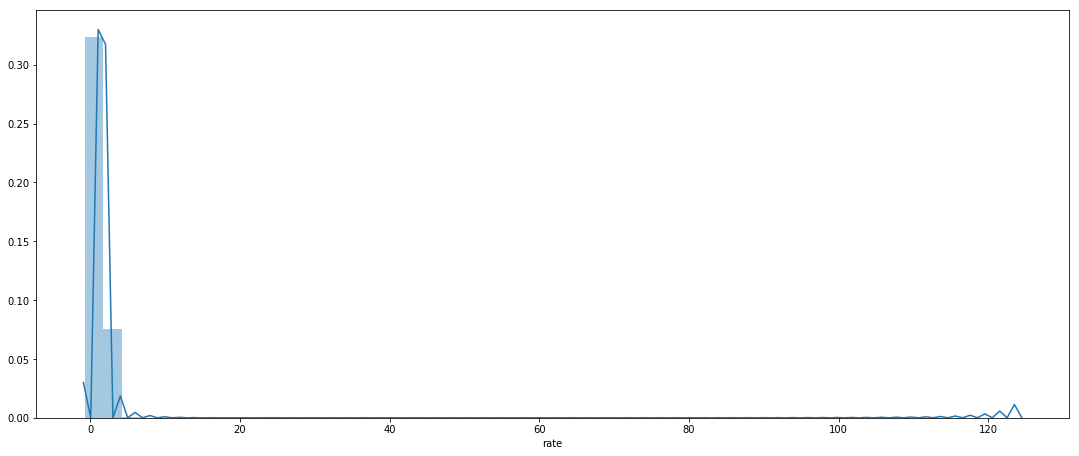

In [33]:
sns.distplot(df['rate'])
plt.xlabel(u'rate')
fig = plt.gcf()
fig.set_size_inches(18.5, 7.5)

plt.show()

In [6]:
r[r>10]

NameError: name 'r' is not defined

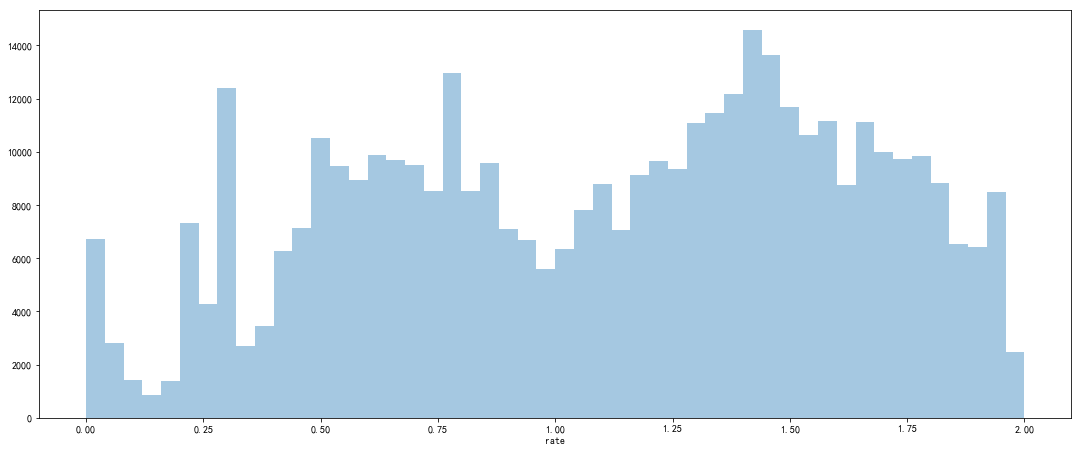

In [7]:

# plt.subplot(121)
sns.distplot(df['rate'][(df['rate']<2) & (df['rate']>0)],kde=False)
# plt.xlabel(u'rate')
# plt.subplot(122)
# sns.boxplot(df['r'][df['r']<1 & df['r']>0])
plt.xlabel(u'rate')
fig = plt.gcf()
fig.set_size_inches(18.5, 7.5)

plt.show()
# plt.savefig('ix_byte_lt_50.png')

In [2]:
def split_rate(rate):
    if rate < 0.5:
        return '< 0.5'
    elif rate >= 0.5 and rate < 1:
        return '0.5 - 1'
    elif rate >= 1 and rate <1.5:
        return '1 - 1.5'
    elif rate >= 1.5 and rate <2:
        return  '1.5 - 2'
    else:
        return '> 2'

df['category_rate'] = df['rate'].apply(split_rate)
    

KeyError: 'rate'

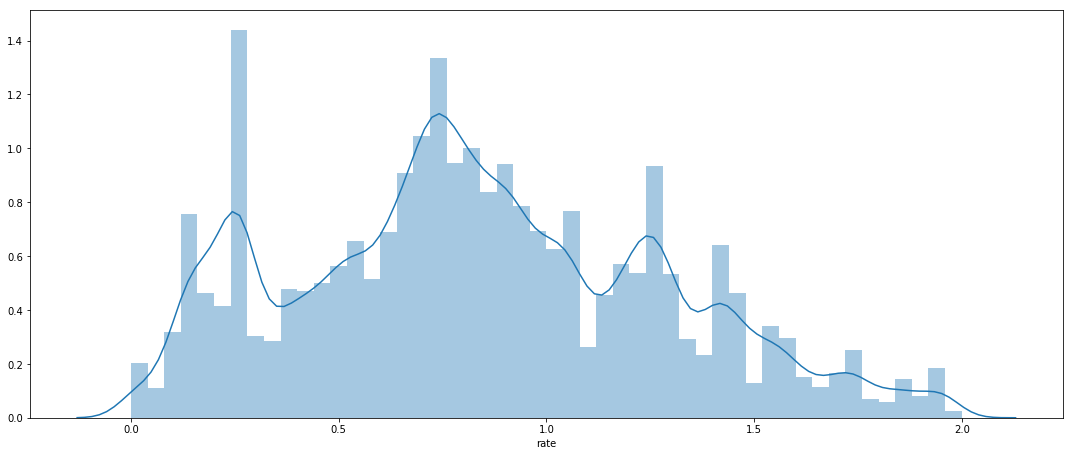

In [90]:

# plt.subplot(121)
sns.distplot(normal['rate'][(normal['rate']<2) & (normal['rate']>0)])
# plt.xlabel(u'rate')
# plt.subplot(122)
# sns.boxplot(df['r'][df['r']<1 & df['r']>0])
plt.xlabel(u'rate')
fig = plt.gcf()
fig.set_size_inches(18.5, 7.5)

plt.show()
# plt.savefig('ix_byte_lt_50.png')

In [14]:
import matplotlib
matplotlib.rcParams['font.family']='SimHei'
ax = sns.countplot(df['category_rate'])
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.0%}'.format(height/total),
            ha="center") 
plt.xlabel(u'比率范围')
plt.ylabel(u'用户数量')
plt.title(u'佣金占收入比率用户数分布情况（关停用户）')
plt.savefig('portion_fig.png')

In [96]:
df.groupby('category_rate').count()

,USER_ID,ACC_NBR,AMAIN_PP_ID,OPEN_DATE,USER_ONLINE_DURA,USER_DEVELOP_DEPART_ID,DEPT_NAME2,DEPT_NAME3,DEPT_NAME4,DEPT_NAME5,...,FIRST_CALL_MSC_CELLID_201704,FIRST_CALL_MSC_CELLID_201705,FIRST_CALL_MSC_CELLID_201706,FEE_12,SETT_CHARGE,SETT_CHARGE_12,delta_time_now,delta_time_now_month,rate,r
category_rate,,,,,,,,,,,,,,,,,,,,,
0.5 - 1,113227,113227,113227,113227,113227,113227,113214,113214,113214,113214,...,71552,81266,74292,113227,113227,113227,113227,113227,113227,113227
1 - 1.5,127091,127091,127091,127091,127091,127091,127091,127091,127091,127091,...,92707,91304,84127,127091,127091,127091,127091,127091,127091,127091
1.5 - 2,109587,109587,109587,109587,109587,109587,109587,109587,109587,109587,...,94427,93312,89205,109587,109587,109587,109587,109587,109587,109587
< 0.5,60520,60520,60520,60520,60520,60520,60420,60420,60420,60420,...,31127,43381,42820,60520,60520,60520,60520,60520,60520,60520
> 2,38567,38567,38567,38567,38567,38567,38567,38567,38567,38567,...,31404,32617,27527,38567,38567,38567,38567,38567,38567,38310


In [16]:
fig =plt.figure()
normal = pd.read_csv('open_date_info.csv')
normal['rate'] = normal['SETT_CHARGE_ALL_BN']/(normal['FEE_ALL_BN']+1)
normal['category_rate'] = normal['rate'].apply(split_rate)

ax = sns.countplot(normal['category_rate'],order=['< 0.5','0.5 - 1','1 - 1.5','1.5 - 2','> 2'])
total = float(len(normal))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.0%}'.format(height/total),
            ha="center") 
plt.xlabel(u'比率范围')
plt.ylabel(u'用户数量')
plt.title(u'佣金占收入比率用户数分布情况（正常用户）')
plt.savefig('normal_portion_percentage.png')

In [70]:
normal = normal.fillna(0)

发展部门的分布有高有低

In [18]:
def split_jwq(rate):
    if rate == 0:
        return '0'
    elif rate ==1:
        return '1'
    elif rate > 1 and rate <= 10:
        return '2 - 10'
    elif rate > 10 and rate <=100:
        return '10 - 100'
    elif rate > 100 and rate <=1000:
        return  '100 - 1000'
    else:
        return '> 1000'
    
df['jwq_cate'] = df['JWQ_NUM_AVG'].apply(split_jwq)

In [22]:
import matplotlib
matplotlib.rcParams['font.family']='SimHei'
fig = plt.figure()
ax = sns.countplot(df['jwq_cate'],order=['0','1','2 - 10','10 - 100','100 - 1000','> 1000'],palette='Blues')
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.0%}'.format(height/total),
            ha="center") 
plt.xlabel(u'交往圈数量')
plt.ylabel(u'用户数量')
plt.title(u'交往圈分布情况（关停用户）')
plt.savefig('jwq_portion1.png')

In [123]:
jwq = df.groupby('jwq_cate').mean()[['CALL_DURATION_AVG','CALL_TIMES_AVG']]

In [125]:
jwq.to_csv('jwq.csv')

In [128]:
jwq_all = df.groupby('JWQ_NUM_AVG').mean()[['CALL_DURATION_AVG','CALL_TIMES_AVG']]
jwq_all['avg'] = jwq_all['CALL_DURATION_AVG']/(jwq_all['CALL_TIMES_AVG']+1)
jwq_all.to_csv('all_jwq.csv')
# sns.distplot(jwq_all['avg'],kde=False)
# plt.show()

In [129]:
df['jwq_cate'].value_counts()

0             178226
2 - 10        120889
1              93279
10 - 100       47352
100 - 1000      7040
> 1000          2206
Name: jwq_cate, dtype: int64

In [107]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
%matplotlib inline

K=range(1,10)
meandistortions=[]
X = np.asarray(df['JWQ_NUM_AVG']).reshape(-1,1)
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(sum(np.min(cdist(
            X,kmeans.cluster_centers_,"euclidean"),axis=1))/X.shape[0])
plt.plot(K,meandistortions,'bx-')
plt.xlabel('K')
plt.ylabel(u'$J(\\theta)$')
plt.title(u'$J(\\theta)$ of different K')
plt.savefig('elbow.png')

KeyboardInterrupt: 

In [130]:
df['delta_time_now_month'].describe()

count    448992.000000
mean          9.596643
std           2.687795
min           5.000000
25%           8.000000
50%           9.000000
75%          11.000000
max         104.000000
Name: delta_time_now_month, dtype: float64